In [169]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data
df = pd.read_csv('credit_risk.csv')
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


- ID: Unique identifier for each loan applicant.
- Age: Age of the loan applicant.
- Income: Income of the loan applicant.
- Home: Home ownership status (Own, Mortgage, Rent).
- Emp_Length: Employment length in years.
- Intent: Purpose of the loan (e.g., education, home improvement).
- Amount: Loan amount applied for.
- Rate: Interest rate on the loan.
- Status: Loan approval status (Fully Paid, Charged Off, Current).
- Percent_Income: Loan amount as a percentage of income.
- Default: Whether the applicant has defaulted on a loan previously (Yes, No).
- Cred_Length: Length of the applicant's credit history.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [124]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Id,32581.0,16290.006139,9405.479594,0.00,8145.00,16290.00,24435.00,32780.00
Age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
Income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
Emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
Amount,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
Rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
Status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
Percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
Cred_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


Something suspicious:
1. The max age is 144??
2. The Emp_length max is 123??

In [125]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Id,int64,0,0.00,32581,"[21687, 32469]"
1,Age,int64,0,0.00,58,"[52, 51]"
2,Income,int64,0,0.00,4295,"[648000, 58992]"
3,Home,object,0,0.00,4,"[RENT, MORTGAGE]"
4,Emp_length,float64,895,2.75,36,"[21.0, 29.0]"
5,Intent,object,0,0.00,6,"[PERSONAL, VENTURE]"
6,Amount,int64,0,0.00,753,"[22100, 16725]"
7,Rate,float64,3116,9.56,348,"[14.11, 18.62]"
8,Status,int64,0,0.00,2,"[1, 0]"
9,Percent_income,float64,0,0.00,77,"[0.05, 0.58]"


In [126]:
df.Status.value_counts()

0    25473
1     7108
Name: Status, dtype: int64

Idea for Article
1. Data cleaning
2. Imbalance Classification
3. Classification model

## Handling Missing Values 

In [127]:
df[df.Emp_length.isna()].sample(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
17955,17955,29,230000,MORTGAGE,NaN,MEDICAL,8500,7.49,0,0.04,N,10
31064,31064,44,62400,RENT,NaN,HOMEIMPROVEMENT,10000,16.82,1,0.16,N,15
7518,7518,23,53500,MORTGAGE,NaN,DEBTCONSOLIDATION,2000,9.62,0,0.04,N,4
5806,5806,21,46800,MORTGAGE,NaN,DEBTCONSOLIDATION,5000,7.51,0,0.11,N,3
3265,3265,21,36000,OWN,NaN,EDUCATION,11000,5.42,0,0.31,N,3


In [128]:
df[df.Rate.isna()].sample(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
14900,14900,25,48000,RENT,9.0,PERSONAL,15000,NaN,1,0.31,N,2
4102,4102,23,21000,RENT,3.0,EDUCATION,4200,NaN,0,0.20,N,3
2232,2232,25,31000,OWN,8.0,PERSONAL,12000,NaN,0,0.39,N,3
6889,6889,22,50004,MORTGAGE,4.0,DEBTCONSOLIDATION,6250,NaN,0,0.12,N,4
1019,1019,25,65000,RENT,8.0,HOMEIMPROVEMENT,18000,NaN,0,0.28,N,3


In [129]:
df[df.Emp_length.isna() & df.Rate.isna()].sample(5)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
9375,9375,23,67200,RENT,NaN,VENTURE,8000,NaN,0,0.12,N,3
7572,7572,22,54000,OWN,NaN,PERSONAL,25000,NaN,0,0.46,N,3
20925,20925,29,44400,MORTGAGE,NaN,PERSONAL,5000,NaN,0,0.11,N,7
20452,20452,27,20400,RENT,NaN,DEBTCONSOLIDATION,4800,NaN,0,0.24,N,6
29805,29805,36,38795,MORTGAGE,NaN,HOMEIMPROVEMENT,2000,NaN,0,0.05,N,13


There are two ideas to impute the missing values:
1. Using simple imputer mean
2. Using KNN imputer

## EDA and Data Cleaning
### Mode: Classification

### 1. The Target Var = Status

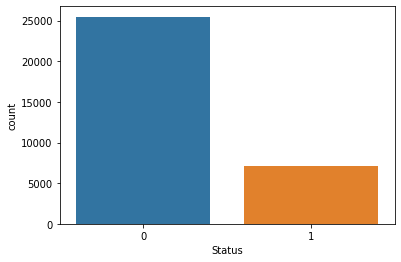

In [130]:
sns.countplot(data=df, x='Status')

Well well, highly imbalance

### 2. Age

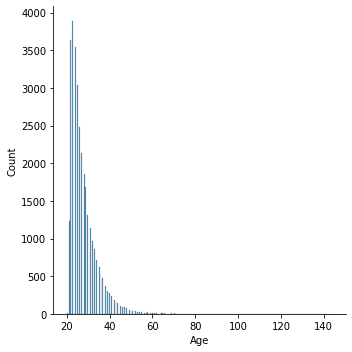

In [131]:
sns.displot(df.Age)

Lets check age more that 60 YO (Not productive)

In [132]:
df[df.Age >60]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
81,81,144,250000,RENT,4.0,VENTURE,4800,13.57,0,0.02,N,3
183,183,144,200000,MORTGAGE,4.0,EDUCATION,6000,11.86,0,0.03,N,2
575,575,123,80004,RENT,2.0,EDUCATION,20400,10.25,0,0.25,N,3
747,747,123,78000,RENT,7.0,VENTURE,20000,NaN,0,0.26,N,4
32297,32297,144,6000000,MORTGAGE,12.0,PERSONAL,5000,12.73,0,0.00,N,25
...,...,...,...,...,...,...,...,...,...,...,...,...
32552,32552,65,45900,RENT,2.0,EDUCATION,10000,NaN,0,0.22,Y,19
32557,32557,69,24000,RENT,3.0,MEDICAL,6000,6.62,0,0.25,N,23
32562,32562,61,160000,MORTGAGE,30.0,PERSONAL,24000,10.38,0,0.15,N,21
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28


There some unrealistic data where the age of the crediture is 144 YO. We will focus our data to the maximum age of 60, we will cut the data over 60 YO (only 0.08%)

In [133]:
df = df[df.Age <= 60]

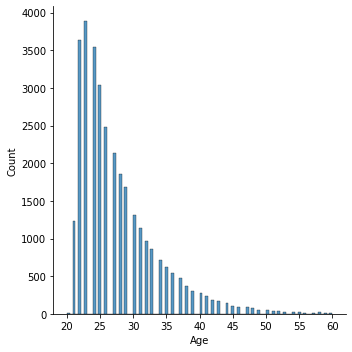

In [134]:
sns.displot(df.Age)

### 3. Emp_length

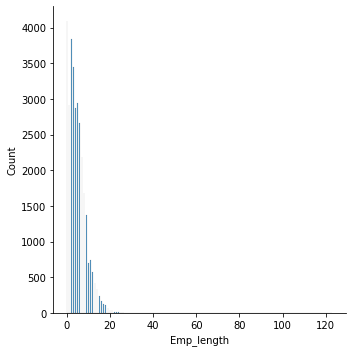

In [135]:
sns.displot(df.Emp_length)

In [136]:
df[df.Emp_length > 30]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
210,210,21,192000,MORTGAGE,123.0,VENTURE,20000,6.54,0,0.10,N,4
30914,30914,48,70000,MORTGAGE,31.0,HOMEIMPROVEMENT,9000,14.54,0,0.13,N,17
31866,31866,47,178000,OWN,31.0,VENTURE,9000,10.99,0,0.05,N,17
31867,31867,46,180000,MORTGAGE,31.0,VENTURE,18000,9.91,0,0.10,N,11
32263,32263,46,180000,MORTGAGE,31.0,MEDICAL,18000,9.91,0,0.10,N,12
32428,32428,58,49000,MORTGAGE,34.0,MEDICAL,7500,13.55,1,0.15,Y,24
32515,32515,53,106000,MORTGAGE,38.0,PERSONAL,20000,9.88,0,0.19,N,23


There is two data where Emp_length is more 123 Years! We will cut the data,

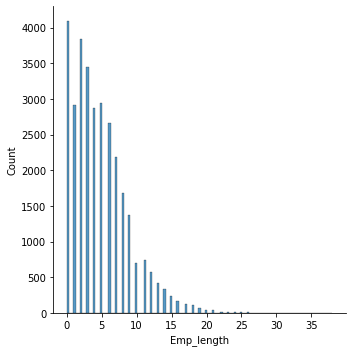

In [137]:
df = df[df.Emp_length < 40]
sns.displot(df.Emp_length)

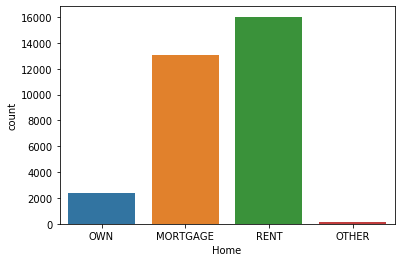

In [138]:
sns.countplot(data=df, x="Home")

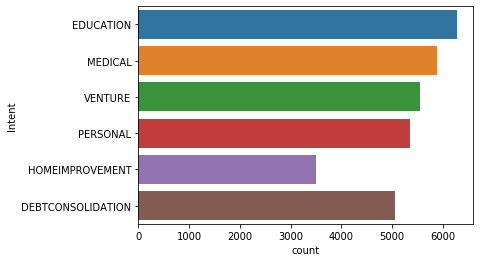

In [139]:
sns.countplot(data=df, y="Intent")

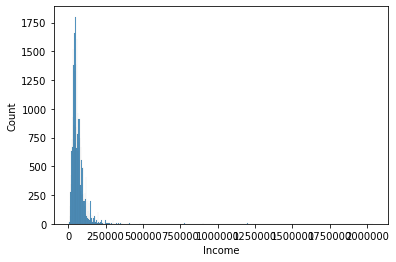

In [140]:
sns.histplot(df.Income)

## Preprocessing

In [141]:
# Importing liberaries for preprocessing
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop Id column
df = df.drop(['Id'], axis=1)

# Define columns for preprocessing
impute_cols = ['Emp_length', 'Rate']
encode_cols = df.select_dtypes(exclude='number').columns.to_list()
Scale_cols = ['Age','Income','Amount','Percent_income','Cred_length']

# Impute missing values and scaling
imputer_mean = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaling', RobustScaler())
])

In [157]:
Preprocessing = ColumnTransformer(
    transformers=[
        ('imputer', imputer_mean, impute_cols),
        ('encoder', OneHotEncoder(handle_unknown='ignore'), encode_cols),
        ('scaling', RobustScaler(), Scale_cols)
    ]
)

## Modelling

In [158]:
# Classificatin models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model processing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from tqdm import tqdm

# Split x and y for the model
y = df['Status']
x = df.drop(['Status'], axis=1)

# Split data to Train and Test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24, stratify=y)

# The models
models = [
    LogisticRegression(), # Logistic Regression
    DecisionTreeClassifier(), # Decision Tree
    SVC(), # Support Vector Machine
    LinearDiscriminantAnalysis(), # Linear Discriminant Analysis
    KNeighborsClassifier(), # K-Nearest Neighbor
    GaussianNB() # Naive Bayes
]

# List for score matrix
accuracy_score = []
accuracy_mean = []
accuracy_std = []

# Calculate model's matrix score
for model in tqdm(models):
    
    # Cross validate split
    crossval = KFold(n_splits=5, shuffle=True, random_state=24)

    # Create pipeline for presprocessing and model
    estimator = Pipeline([
        ('preprocessing', Preprocessing),
        ('model', model)
    ])

    # Calculate the accuracy from cross validation
    accuracy = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='accuracy', 
        error_score='raise'
        )

    #accuracy_score.append(accuracy)
    accuracy_mean.append(accuracy.mean())
    accuracy_std.append(accuracy.std())

# Model Matrix Evaluation
model_matrix = pd.DataFrame({
    'Model': ['LogisticRegression', 'DecisionTree', 'SVC',  'LinearDiscriminantAnalysis', 'KNeighborsClassifier','GaussianNB'],
    'Accuracy Mean': accuracy_mean,
    'Accuracy Std': accuracy_std
})
model_matrix.sort_values(by='Accuracy Mean', ascending=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:51<00:00, 28.55s/it]


,Model,Accuracy Mean,Accuracy Std
2,SVC,0.890954,0.005039
1,DecisionTree,0.871501,0.002841
4,KNeighborsClassifier,0.866242,0.005338
0,LogisticRegression,0.845327,0.004300
3,LinearDiscriminantAnalysis,0.843508,0.005240
5,GaussianNB,0.792899,0.005528


In [168]:
prediction = model.predict(X_test)

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Print accuracy and classification report
accuracy = accuracy_score(y_test, prediction)
classification_rep = classification_report(y_test, prediction)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)